<a href="https://colab.research.google.com/github/nataliasus121-source/Python_Project/blob/main/Exploratory_data_analysis_for_online_store_Portfolio_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-cloud-bigquery

from google.colab import auth
from google.cloud import bigquery
import pandas as pd


In [ ]:
auth.authenticate_user()


In [ ]:
client = bigquery.Client(project="data-analytics-mate")


In [ ]:
query = """
SELECT
    s.date                            AS order_date,
    s.ga_session_id,

    sp.continent,
    sp.country,
    sp.device,
    sp.browser,
    sp.mobile_model_name,
    sp.operating_system,
    sp.language,
    sp.medium                         AS traffic_source,
    sp.channel                        AS traffic_channel,

    acs.account_id,
    acc.is_verified                   AS is_email_verified,
    acc.is_unsubscribed               AS is_unsubscribed,

    p.category,
    p.name                            AS product_name,
    p.price,
    p.short_description

FROM `data-analytics-mate.DA.session` s

left JOIN `DA.order` o
    ON o.ga_session_id = s.ga_session_id

LEFT JOIN `data-analytics-mate.DA.session_params` sp
    ON s.ga_session_id = sp.ga_session_id

LEFT JOIN `data-analytics-mate.DA.account_session` acs
    ON s.ga_session_id = acs.ga_session_id

LEFT JOIN `data-analytics-mate.DA.account` acc
    ON acs.account_id = acc.id

left JOIN `data-analytics-mate.DA.product` p
    ON o.item_id = p.item_id

"""



In [ ]:
query_job = client.query(query)  # Performing SQL-request
results = query_job.result()  # waiting for results
df = results.to_dataframe()
df.head()

,order_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,traffic_channel,account_id,is_email_verified,is_unsubscribed,category,product_name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,organic,Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(none),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


## Dataset Description: Orders Enriched with Session, Traffic, User, and Product Data

This table contains **order-level data enriched with session metadata, traffic attribution, user subscription information, and product attributes**.
Each row represents **one purchased product within a single user session**.

---

## Column Descriptions

### Order & Session Information

| Column Name     | Description                                                                             |
| --------------- | --------------------------------------------------------------------------------------- |
| `order_date`    | Date of the session  |
| `ga_session_id` | Unique identifier of the user session in which the product was purchased.               |

---

### Traffic & Session Attributes

| Column Name         | Description                                                                        |
| ------------------- | ---------------------------------------------------------------------------------- |
| `continent`         | Continent derived from the user’s IP address during the session.                   |
| `country`           | Country derived from the user’s IP address during the session.                     |
| `device`            | Type of device used in the session (desktop, mobile, tablet).                      |
| `browser`           | Browser used by the user during the session.                                       |
| `mobile_model_name` | Model name of the mobile device, if applicable.                                    |
| `operating_system`  | Operating system of the user’s device.                                             |
| `language`          | Browser language setting used during the session.                                  |
| `traffic_medium`    | Medium that describes how the user arrived at the site (e.g. organic, cpc, referral). |
| `traffic_channel`   | High-level traffic channel grouping (e.g. Organic Search, Paid Search, Direct).    |

---

### User Subscription Information

| Column Name         | Description                                                                                           |
| ------------------- | ----------------------------------------------------------------------------------------------------- |
| `account_id`        | Identifier of the email subscriber account associated with the session, if available.                 |
| `is_email_verified` | Indicates whether the user confirmed their email address (1 = verified, 0 = not verified).            |
| `is_unsubscribed`   | Indicates whether the user unsubscribed from email communications (1 = unsubscribed, 0 = subscribed). |

---

### Product Information

| Column Name         | Description                                   |
| ------------------- | --------------------------------------------- |
| `category`          | Product category.                             |
| `product_name`      | Name of the purchased product.                |
| `price`             | Product price in USD at the time of purchase. |
| `short_description` | Short textual description of the product.     |



# **Dataset overview.**

In [ ]:
# Quantity of rows and columns in datasets
print("Table Online Store Analytics:", df.shape)

Table Online Store Analytics: (349545, 18)


In [ ]:
#Quantity of missing values
print("Table Online Store Analytics:", "\n", df.isna().sum())

Table Online Store Analytics: 
 order_date                0
ga_session_id             0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language             114266
traffic_source            0
traffic_channel           0
account_id           321600
is_email_verified    321600
is_unsubscribed      321600
category             316007
product_name         316007
price                316007
short_description    316007
dtype: int64


In [ ]:
#Persentage of missing values
print("Table Online Store Analytics:", "\n", df.isna().sum() / df.shape[0] * 100)

Table Online Store Analytics: 
 order_date            0.000000
ga_session_id         0.000000
continent             0.000000
country               0.000000
device                0.000000
browser               0.000000
mobile_model_name     0.000000
operating_system      0.000000
language             32.689925
traffic_source        0.000000
traffic_channel       0.000000
account_id           92.005321
is_email_verified    92.005321
is_unsubscribed      92.005321
category             90.405241
product_name         90.405241
price                90.405241
short_description    90.405241
dtype: float64


In [ ]:
#General information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   traffic_source     349545 non-null  object 
 10  traffic_channel    349545 non-null  object 
 11  account_id         27945 non-null   Int64  
 12  is_email_verified  27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  category           33538 non-null   object 
 15  product_name       33538 non-null   object 
 16  pr

In [ ]:
#Types of data in the datasets
print("Table Online Store Analytics:", "\n", df.dtypes)

Table Online Store Analytics: 
 order_date            dbdate
ga_session_id          Int64
continent             object
country               object
device                object
browser               object
mobile_model_name     object
operating_system      object
language              object
traffic_source        object
traffic_channel       object
account_id             Int64
is_email_verified      Int64
is_unsubscribed        Int64
category              object
product_name          object
price                float64
short_description     object
dtype: object


In [ ]:
df['ga_session_id'].nunique()


349545

In [ ]:
df['order_date'].min(), df['order_date'].max()


(datetime.date(2020, 11, 1), datetime.date(2021, 1, 31))

In [ ]:
# filling gaps in the events dataframe in the "Country Code" column with the "Unknown"
df.fillna({"language": "Unknown"}, inplace=True)

In [ ]:
#Quantity of missing values
print("Table Online Store Analytics:", "\n", df.isna().sum())

Table Online Store Analytics: 
 order_date                0
ga_session_id             0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language                  0
traffic_source            0
traffic_channel           0
account_id           321600
is_email_verified    321600
is_unsubscribed      321600
category             316007
product_name         316007
price                316007
short_description    316007
dtype: int64


### **Dataset Overview**: *Online Store Analytics*

* **Total number of columns:** 18
* **Total number of rows:** 349,545

---

### Data Types

* **Numeric columns (5):**

  * `ga_session_id` (Int64)
  * `account_id` (Int64)
  * `is_email_verified` (Int64)
  * `is_unsubscribed` (Int64)
  * `price` (float64)

* **Categorical columns (12):**

  * `continent`
  * `country`
  * `device`
  * `browser`
  * `mobile_model_name`
  * `operating_system`
  * `language`
  * `traffic_source`
  * `traffic_channel`
  * `category`
  * `product_name`
  * `short_description`

* **Datetime columns (1):**

  * `order_date`

---

### Sessions and Time Range

* **Number of unique sessions:** 349,545
* **Time period covered:** from **2020-11-01** to **2021-01-31**

---

### Missing Values

* **Presence of missing values:** Yes

* **Columns with the highest number of missing values:**

  * `account_id`, `is_email_verified`, `is_unsubscribed`

    * ~92% missing
    * **Reason:** most sessions are anonymous and not linked to a registered account.
  * `category`, `product_name`, `price`, `short_description`

    * ~90% missing
    * **Reason:** these fields are populated only for sessions with completed orders; sessions without purchases have no product data.
  * `language`

    * originally ~33% missing, later filled with `"Unknown"`.

---

### Summary

The dataset is built at the **session level**, includes **all sessions**, and enriches them with optional account and product information. High proportions of missing values are expected and logically explained by the absence of user authentication and purchases in most sessions.


#**Dataset Analysis**: *Online Store Analytics*

In [ ]:
import matplotlib.pyplot as plt

# Create a sales-only dataframe (sessions with purchases)
sales_df = df[df['price'].notna()].copy()

# Total revenue (used for percentage calculations)
total_revenue = sales_df['price'].sum()
total_orders = sales_df.shape[0]

print("Total orders:", total_orders)
print("Total revenue:", round(total_revenue, 2))



Total orders: 33538
Total revenue: 31971731.1


####**Top-3 continents & Top-5 countries**

In [ ]:
# --- By revenue ---
top_continents_revenue = (
    sales_df.groupby('continent')['price']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

top_countries_revenue = (
    sales_df.groupby('country')['price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# --- By number of orders ---
top_continents_orders = (
    sales_df.groupby('continent')
    .size()
    .sort_values(ascending=False)
    .head(3)
)

top_countries_orders = (
    sales_df.groupby('country')
    .size()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 3 continents by revenue:\n", top_continents_revenue)
print("\nTop 5 countries by revenue:\n", top_countries_revenue)

print("\nTop 3 continents by orders:\n", top_continents_orders)
print("\nTop 5 countries by orders:\n", top_countries_orders)


Top 3 continents by revenue:
 continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

Top 5 countries by revenue:
 country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64

Top 3 continents by orders:
 continent
Americas    18553
Asia         7950
Europe       6261
dtype: int64

Top 5 countries by orders:
 country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678
dtype: int64


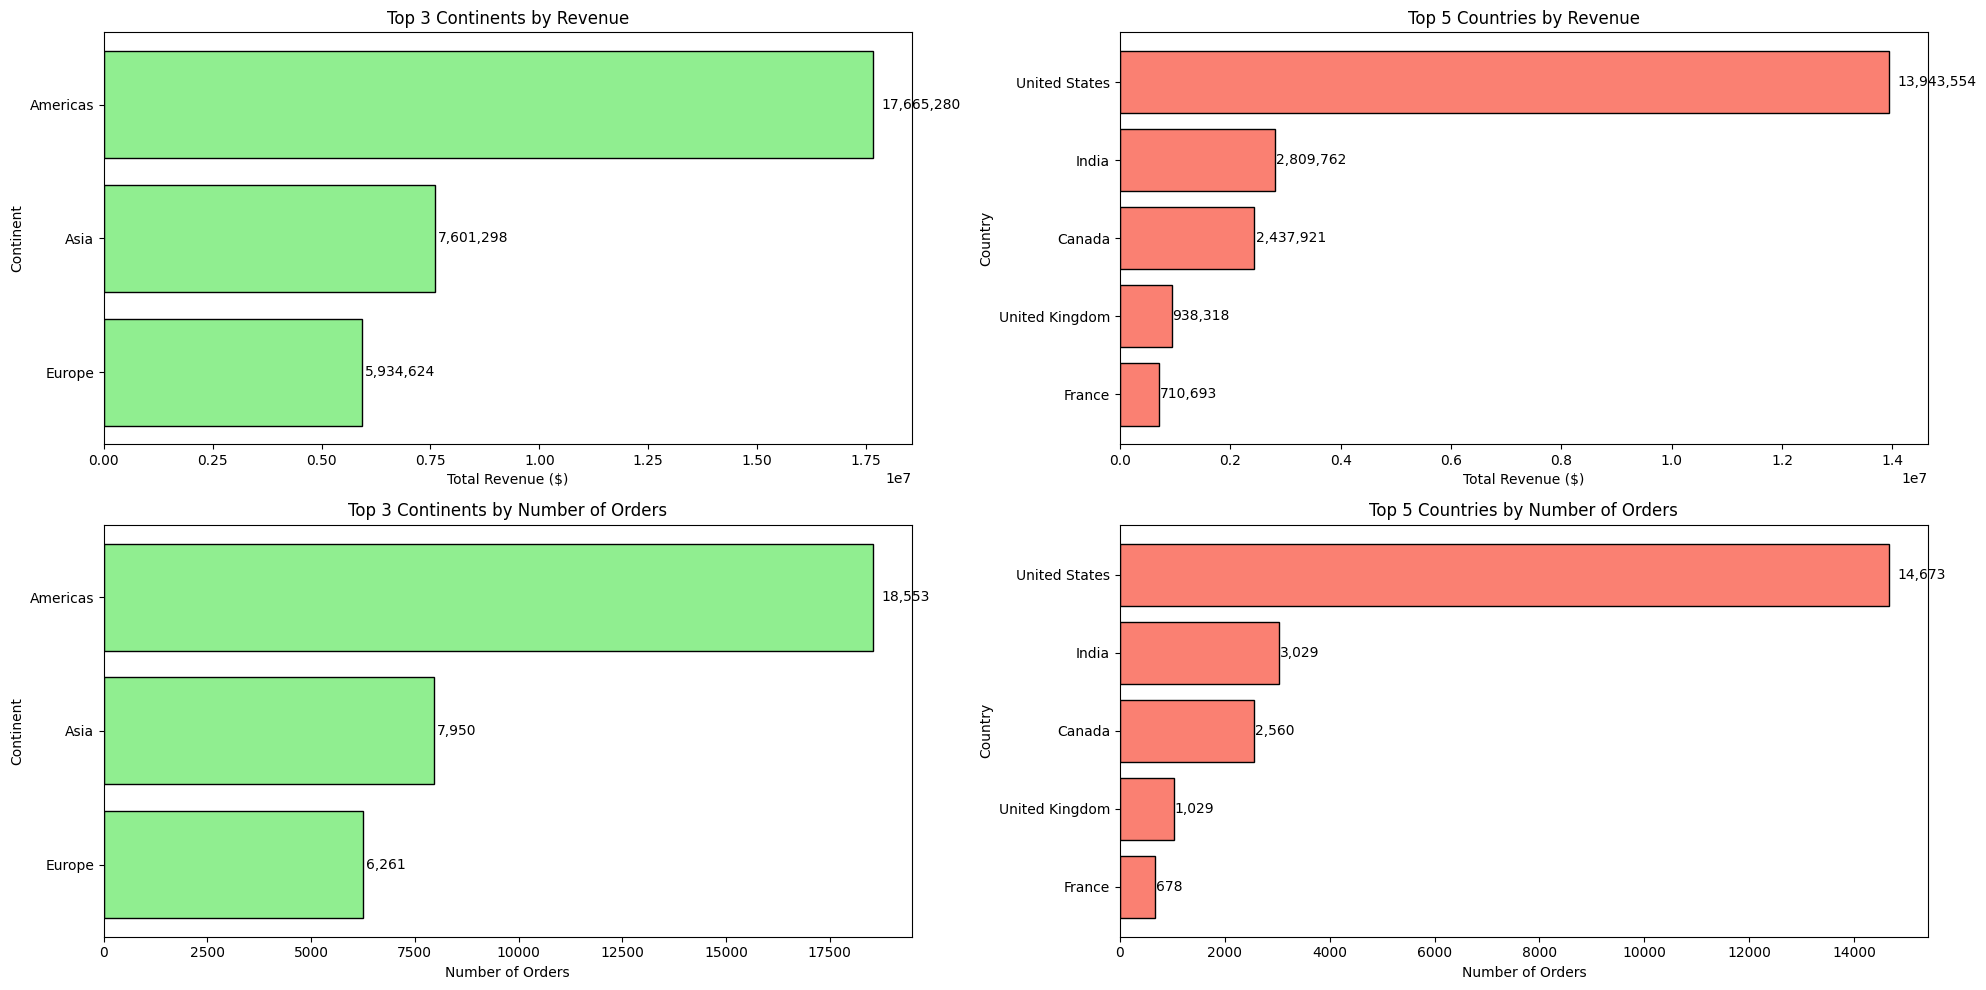

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# --- Top 3 continents by revenue ---
ax[0, 0].barh(
    top_continents_revenue.index,
    top_continents_revenue.values,
    color="lightgreen",
    edgecolor="black"
)
ax[0, 0].set_title("Top 3 Continents by Revenue")
ax[0, 0].set_xlabel("Total Revenue ($)")
ax[0, 0].set_ylabel("Continent")
ax[0, 0].invert_yaxis()

for i, value in enumerate(top_continents_revenue.values):
    ax[0, 0].text(value * 1.01, i, f"{value:,.0f}", va="center")


# --- Top 5 countries by revenue ---
ax[0, 1].barh(
    top_countries_revenue.index,
    top_countries_revenue.values,
    color="salmon",
    edgecolor="black"
)
ax[0, 1].set_title("Top 5 Countries by Revenue")
ax[0, 1].set_xlabel("Total Revenue ($)")
ax[0, 1].set_ylabel("Country")
ax[0, 1].invert_yaxis()

for i, value in enumerate(top_countries_revenue.values):
    ax[0, 1].text(value * 1.01, i, f"{value:,.0f}", va="center")


# --- Top 3 continents by number of orders ---
ax[1, 0].barh(
    top_continents_orders.index,
    top_continents_orders.values,
    color="lightgreen",
    edgecolor="black"
)
ax[1, 0].set_title("Top 3 Continents by Number of Orders")
ax[1, 0].set_xlabel("Number of Orders")
ax[1, 0].set_ylabel("Continent")
ax[1, 0].invert_yaxis()

for i, value in enumerate(top_continents_orders.values):
    ax[1, 0].text(value * 1.01, i, f"{value:,.0f}", va="center")


# --- Top 5 countries by number of orders ---
ax[1, 1].barh(
    top_countries_orders.index,
    top_countries_orders.values,
    color="salmon",
    edgecolor="black"
)
ax[1, 1].set_title("Top 5 Countries by Number of Orders")
ax[1, 1].set_xlabel("Number of Orders")
ax[1, 1].set_ylabel("Country")
ax[1, 1].invert_yaxis()

for i, value in enumerate(top_countries_orders.values):
    ax[1, 1].text(value * 1.01, i, f"{value:,.0f}", va="center")


plt.tight_layout()
plt.show()


#####**Geographic performance**
***Continents***

* **Americas** dominate both revenue and order volume, generating over USD 17.6M and 18.5K orders.

* **Asia** is the second-largest market, showing strong monetization relative to order count.

* **Europe** ranks third, with lower revenue and fewer orders compared to Asia.

*Conclusion:*
The business is heavily concentrated in the Americas, with Asia showing strong growth potential.


***Countries***

* The **United States** is by far the largest market, accounting for the majority of both revenue and orders.

* **India** and **Canada** form a strong second tier.

* **European countries **(UK, France) contribute meaningfully but remain significantly smaller than the US.

*Conclusion*:
Sales are highly concentrated in the US, with India and Canada emerging as key secondary markets.

####**Top-10 product categories by total revenue**

In [ ]:
top_categories_global = (
    sales_df.groupby('category')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop-10 product categories by total revenue:\n", top_categories_global)



Top-10 product categories by total revenue:
 category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


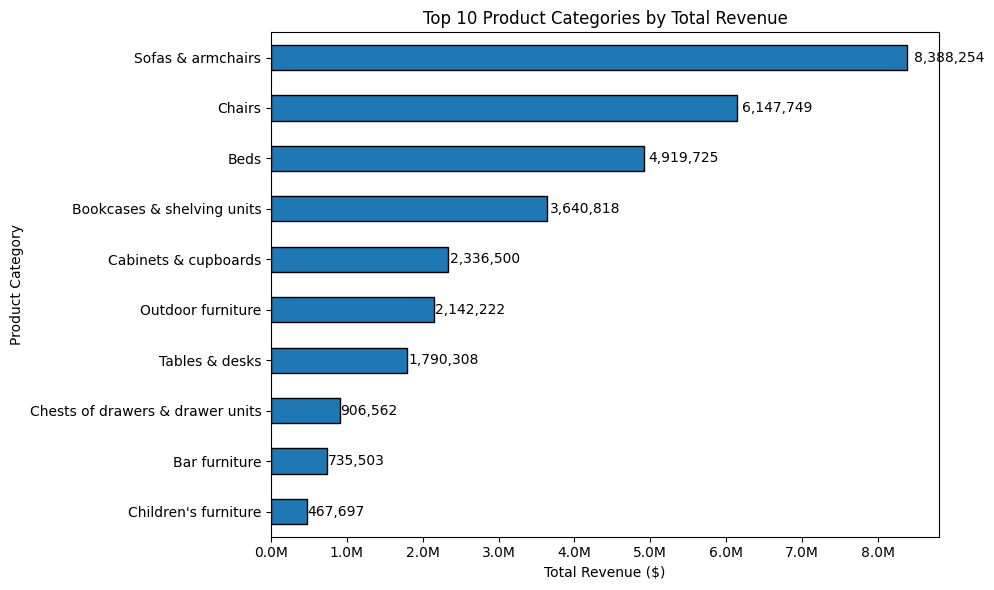

In [ ]:
plt.figure(figsize=(10, 6))

top_categories_global.sort_values().plot(
    kind="barh",
    edgecolor="black"
)

plt.title("Top 10 Product Categories by Total Revenue")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Category")

# Format Revenue axis (millions)
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)

# Add value labels
for i, value in enumerate(top_categories_global.sort_values()):
    plt.text(value * 1.01, i, f"{value:,.0f}", va="center")

plt.tight_layout()
plt.show()


#####**Top product categories (global)**

**Sofas & armchairs, Chairs, and Beds** are the top three revenue drivers.

These categories represent large, high-value furniture items.

Lower-priced or niche categories (e.g., Children’s furniture) contribute marginally.

*Conclusion*:
Revenue is driven primarily by large furniture items rather than accessories or niche products.

####**Top-10 categories in the country with the highest sales**

In [ ]:
# Country with the highest revenue
top_country = (
    sales_df.groupby('country')['price']
    .sum()
    .idxmax()
)

print("Top revenue country:", top_country)

top_categories_top_country = (
    sales_df[sales_df['country'] == top_country]
    .groupby('category')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop-10 categories in the country with the highest sales:\n", top_categories_top_country)


Top revenue country: United States

Top-10 categories in the country with the highest sales:
 category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


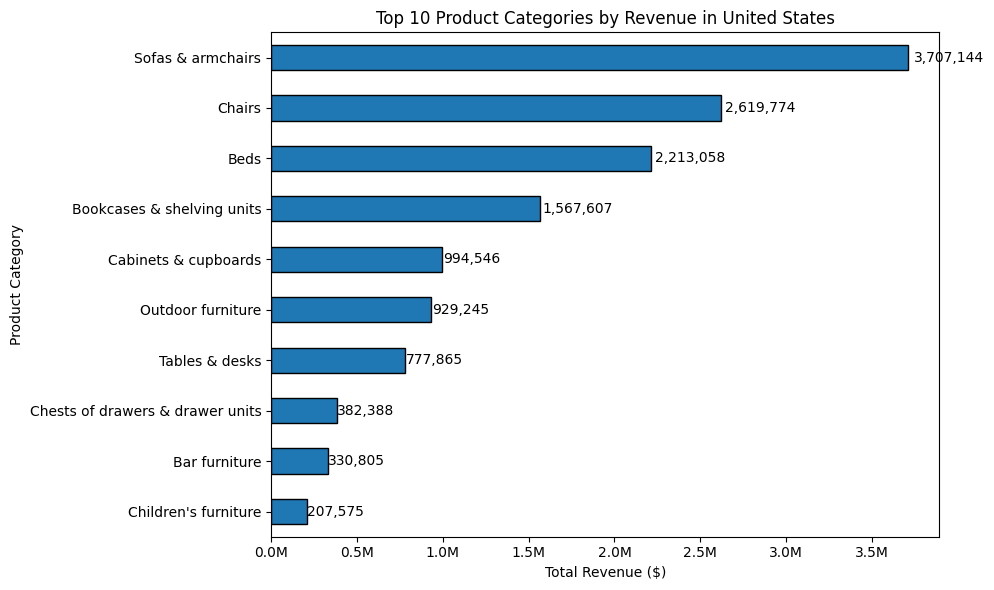

In [ ]:
plt.figure(figsize=(10, 6))

top_categories_top_country.sort_values().plot(
    kind="barh",
    edgecolor="black"
)

plt.title(f"Top 10 Product Categories by Revenue in {top_country}")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Category")

# Format Revenue axis (millions)
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)

# Add value labels
for i, value in enumerate(top_categories_top_country.sort_values()):
    plt.text(value * 1.01, i, f"{value:,.0f}", va="center")

plt.tight_layout()
plt.show()


#####**Category structure in the top-revenue country (United States)**

The **US** category ranking mirrors the global structure almost exactly.

No major deviations in customer preferences are observed.

*Conclusion*:
The US market is representative of global product demand, indicating a consistent product strategy across regions.

####**Sales by device type (% of total revenue)**

In [ ]:
device_sales = (
    sales_df.groupby('device')['price']
    .sum()
    .sort_values(ascending=False)
)

device_sales_pct = device_sales / total_revenue * 100

print("\nSales by device type (% of total revenue):\n", device_sales_pct)



Sales by device type (% of total revenue):
 device
desktop    59.002245
mobile     38.734924
tablet      2.262831
Name: price, dtype: float64


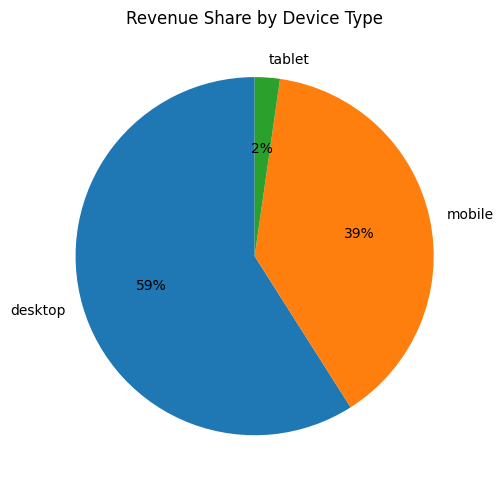

In [ ]:
ax = device_sales_pct.plot(
    kind='pie',
    autopct='%1.0f%%',          # no decimals
    startangle=90,
    figsize=(8, 5),
    legend=False
)

ax.set_ylabel("")               # remove "price" / ylabel
ax.set_title("Revenue Share by Device Type")

plt.tight_layout()
plt.show()

#####**Sales by device type**

* Desktop accounts for ~59% of total revenue, making it the dominant channel.

* Mobile contributes a significant ~39%, indicating strong mobile commerce adoption.

* Tablet usage is marginal.

*Conclusion:*
While desktop remains dominant, mobile is a critical revenue channel and should not be deprioritized.

####**Sales by model/ browser (% of total revenue)**

In [ ]:
model_sales = (
    sales_df.groupby('mobile_model_name')['price']
    .sum()
    .sort_values(ascending=False)
)

device_sales_pct = device_sales / total_revenue * 100

model_sales_pct = model_sales / total_revenue * 100

print("\nSales by model (% of total revenue):\n", model_sales_pct)



Sales by model (% of total revenue):
 mobile_model_name
Chrome        27.835602
<Other>       20.440966
Safari        20.302504
iPhone        20.082667
ChromeBook     5.725241
Edge           2.180746
iPad           1.403910
Firefox        1.316998
Pixel 4 XL     0.369976
Pixel 3        0.341390
Name: price, dtype: float64


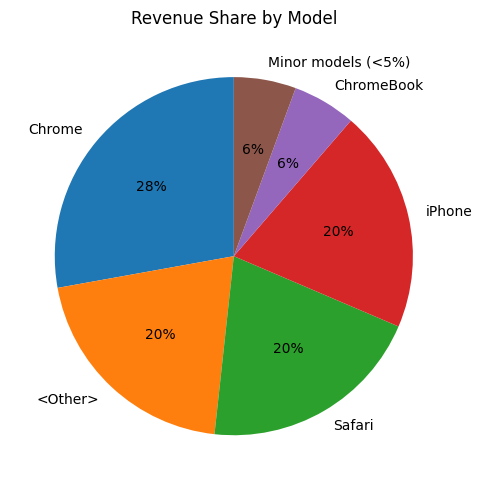

In [ ]:
threshold = 5  # %

model_sales_pct_clean = model_sales_pct.copy()

# Separate large and small shares
large = model_sales_pct_clean[model_sales_pct_clean >= threshold]
small = model_sales_pct_clean[model_sales_pct_clean < threshold]

# Combine small shares into "Other"
model_sales_pct_final = large.copy()
model_sales_pct_final["Minor models (<5%)"] = small.sum()

ax = model_sales_pct_final.plot(
    kind='pie',
    autopct='%1.0f%%',      # no decimals
    startangle=90,
    figsize=(8, 5),
    legend=False
)

ax.set_ylabel("")
ax.set_title("Revenue Share by Model")

plt.tight_layout()
plt.show()


#####**Sales by model / browser**

**Chrome, Safari,** and **iPhone** collectively generate the majority of revenue.

Revenue is spread across multiple ecosystems rather than a single dominant platform.

*Conclusion:*
Cross-browser and cross-device compatibility is essential for revenue preservation.

####**Sales by traffic source (% of total revenue)**

In [ ]:
traffic_sales = (
    sales_df.groupby('traffic_source')['price']
    .sum()
    .sort_values(ascending=False)
)

traffic_sales_pct = traffic_sales / total_revenue * 100

traffic_sales_pct


,price
traffic_source,
organic,34.202840
(none),23.442345
referral,17.646386
<Other>,14.047882
(data deleted),6.386645
cpc,4.273902


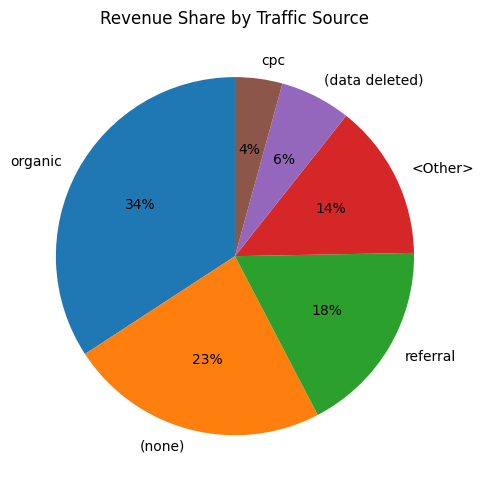

In [ ]:
ax = traffic_sales_pct.plot(
    kind='pie',
    autopct='%1.0f%%',          # no decimals
    startangle=90,
    figsize=(8, 5),
    legend=False
)

ax.set_ylabel("")               # remove "price" / ylabel
ax.set_title("Revenue Share by Traffic Source")

plt.tight_layout()
plt.show()


#####**Sales by traffic source**

**Organic traffic** is the largest revenue contributor (34%).

Referrals account for over 14% of revenue.

Paid traffic (CPC) contributes relatively little.

*Conclusion:*
SEO and brand recognition are more effective revenue drivers than paid advertising.

####**% of registered users who verified email**

In [ ]:
registered_users = df[df['account_id'].notna()]

email_verified_pct = (
    registered_users['is_email_verified'].mean() * 100
)

print(f"Percentage of registered users who verified email: {email_verified_pct:.2f}%")


Percentage of registered users who verified email: 71.70%


**Email verification** adoption is high, indicating good onboarding and user engagement quality.

####**% of registered users who unsubscribed**

In [ ]:
unsubscribed_pct = (
    registered_users['is_unsubscribed'].mean() * 100
)

print(f"Percentage of registered users who verified email: {unsubscribed_pct:.2f}%")


Percentage of registered users who verified email: 16.94%


#####**Newsletter unsubscribe rate**

Only ~16.9% of registered users have unsubscribed from communications.

*Conclusion*:
The majority of users remain subscribed, suggesting acceptable content relevance and frequency.

####**Sales behavior: subscribed vs unsubscribed users**

In [ ]:
subscription_sales = (
    sales_df[sales_df['account_id'].notna()]
    .groupby('is_unsubscribed')['price']
    .agg(['count', 'sum', 'mean'])
)

subscription_sales


,count,sum,mean
is_unsubscribed,,,
0,2334,2150796.9,921.506812
1,447,431721.6,965.820134


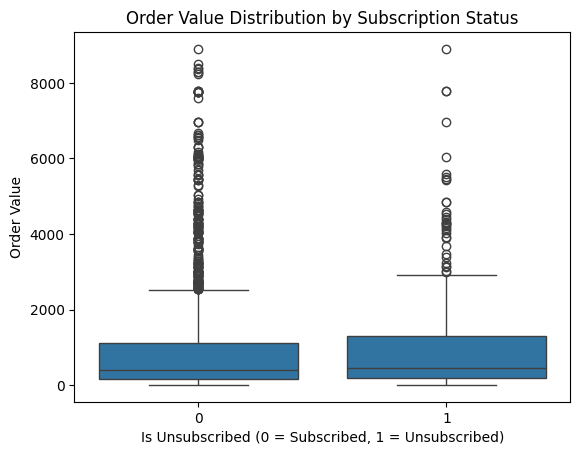

In [ ]:
# Seaborn scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=sales_df, x="is_unsubscribed", y="price")
plt.title("Order Value Distribution by Subscription Status")
plt.xlabel("Is Unsubscribed (0 = Subscribed, 1 = Unsubscribed)")
plt.ylabel("Order Value")
plt.show()


**Business Insights**
* ***Similarity in Typical Behavior***: The median order value is nearly identical for both groups. This suggests that the "typical" customer spends roughly the same amount per order, regardless of their subscription status.

* ***High-Value Segment Gap***: There is a significant difference in "top-tier" spending. The Subscribed (0) group shows a much higher density of expensive orders (outliers), with a consistent stream of purchases reaching up to the 6,000 mark.

* ***Extreme Outliers***: Both groups contain rare, extreme anomalies peaking around 9,000. These represent isolated cases of exceptionally high spending that sit far outside the normal distribution for both subscribed and unsubscribed users.

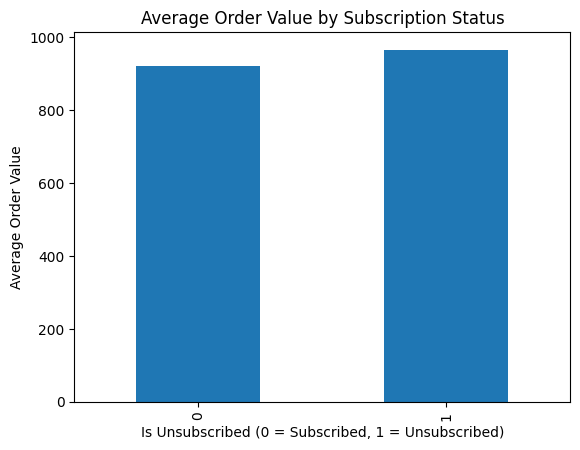

In [ ]:
sales_df.groupby("is_unsubscribed")["price"].mean().plot(kind="bar")
plt.title("Average Order Value by Subscription Status")
plt.xlabel("Is Unsubscribed (0 = Subscribed, 1 = Unsubscribed)")
plt.ylabel("Average Order Value")
plt.show()


**Interpretation guide**:

*count* → number of orders

*sum* → total revenue

*mean* → average order value

Subscribed users generate higher total revenue due to volume.

Unsubscribed users have a slightly higher average order value.

The difference in AOV is minor and not commercially significant.

*Conclusion*:
Unsubscribing does not imply lower spending behavior; high-value customers may still opt out of marketing emails.

####**Countries with the highest number of registered users**

In [ ]:
top_countries_registered = (
    registered_users.groupby('country')['account_id']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

top_countries_registered


,account_id
country,
United States,12384
India,2687
Canada,2067
United Kingdom,859
France,553
Spain,536
Taiwan,500
China,490
Germany,490


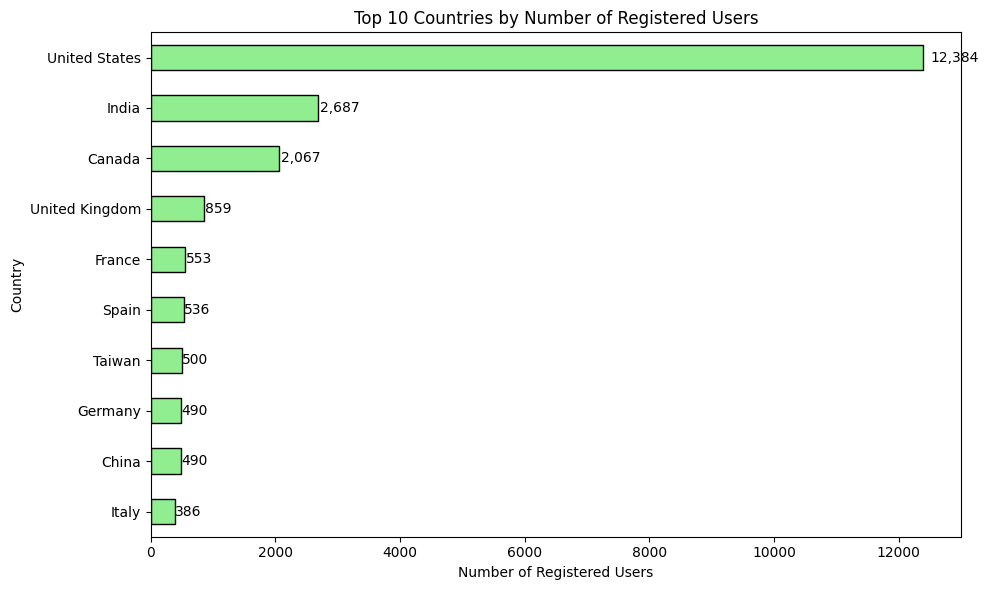

In [ ]:
plt.figure(figsize=(10, 6))

top_countries_registered.sort_values().plot(
    kind='barh',
    color="lightgreen",
    edgecolor='black'
)

plt.title('Top 10 Countries by Number of Registered Users')
plt.xlabel('Number of Registered Users')
plt.ylabel('Country')

# Add value labels
for i, value in enumerate(top_countries_registered.sort_values()):
    plt.text(value * 1.01, i, f"{value:,}", va='center')

plt.tight_layout()
plt.show()


**Registered users by country**

* The **United States** has the largest registered user base by a wide margin.

* **India** and **Canada** follow, aligning with revenue patterns.

* **European** and **Asian** countries show moderate but consistent registration levels.

*Conclusion:*
User registration distribution closely matches revenue geography.

####**Average order value by traffic channel**

In [ ]:
aov_by_channel = (
    sales_df.groupby('traffic_channel')['price']
    .mean()
    .sort_values(ascending=False)
)

aov_by_channel


,price
traffic_channel,
Undefined,971.588635
Direct,960.887615
Organic Search,959.076554
Paid Search,941.279518
Social Search,932.292231


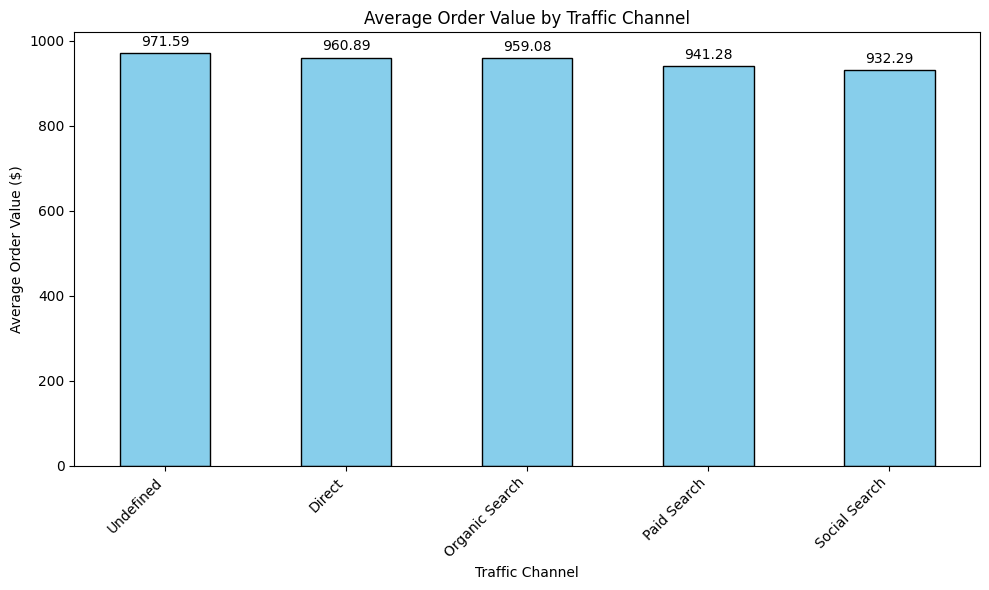

In [ ]:
plt.figure(figsize=(10, 6))

aov_by_channel.plot(
    kind='bar',
    color="skyblue",
    edgecolor='black'
)

plt.title('Average Order Value by Traffic Channel')
plt.ylabel('Average Order Value ($)')
plt.xlabel('Traffic Channel')
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(aov_by_channel):
    plt.text(i, value * 1.01, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Average order value by traffic channel**

AOV is remarkably consistent across channels (~USD 930 - 970).

**No channel stands out as significantly more profitable per order**.

*Conclusion:*
Traffic quality is similar across channels; scaling volume matters more than channel optimization for AOV.

####**Revenue concentration: top 20% of categories**

In [ ]:
category_revenue_share = (
    sales_df.groupby('category')['price']
    .sum()
    .sort_values(ascending=False)
)

cumulative_share = category_revenue_share.cumsum() / total_revenue * 100

cumulative_share.head(10)


,price
category,
Sofas & armchairs,26.236473
Chairs,45.465174
Beds,60.852909
Bookcases & shelving units,72.240525
Cabinets & cupboards,79.548542
Outdoor furniture,86.248905
Tables & desks,91.848563
Chests of drawers & drawer units,94.684076
Bar furniture,96.984555


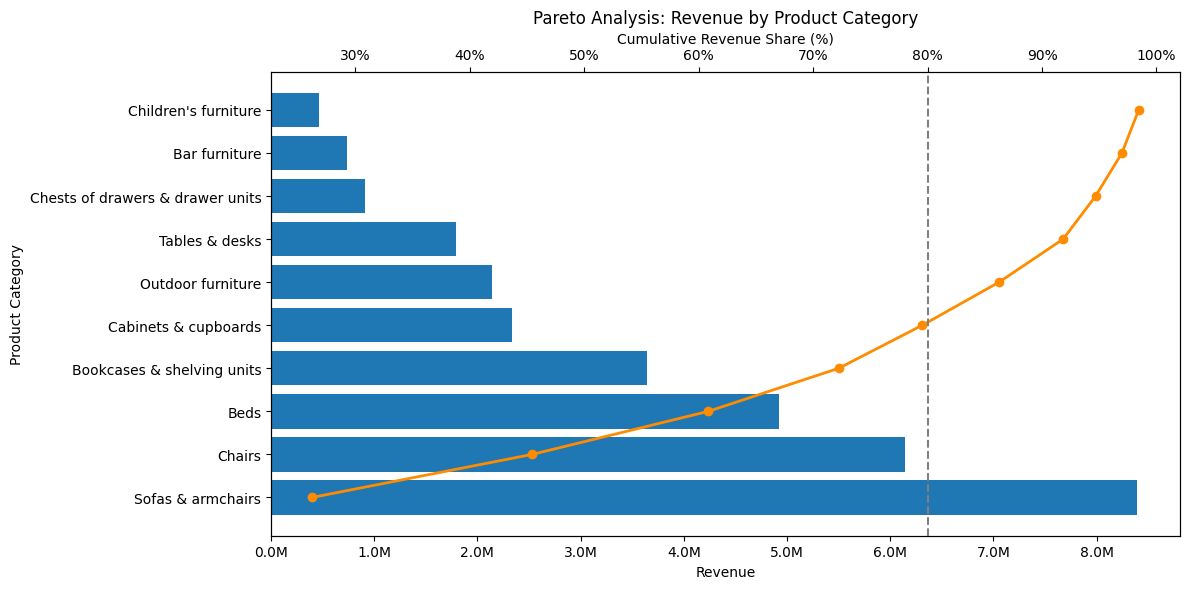

In [ ]:
import matplotlib.ticker as mtick


total_revenue = category_revenue_share.sum()
cumulative_share = category_revenue_share.cumsum() / total_revenue * 100

# Top 10 categories
top_n = 10
top_categories = category_revenue_share.head(top_n)
top_cumulative = cumulative_share.head(top_n)


plt.figure(figsize=(12, 6))

# Revenue bars
plt.barh(top_categories.index, top_categories.values)
plt.xlabel('Revenue')
plt.ylabel('Product Category')

# Format Revenue axis (millions)
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
)

# Cumulative line
ax2 = plt.twiny()
ax2.plot(
    top_cumulative.values,
    top_cumulative.index,
    marker='o',
    color='darkorange',
    linewidth=2
)

ax2.set_xlabel('Cumulative Revenue Share (%)')
ax2.xaxis.set_major_formatter(mtick.PercentFormatter())
ax2.axvline(80, linestyle='--', color='grey')

plt.title('Pareto Analysis: Revenue by Product Category')
plt.tight_layout()
plt.show()




#####**Revenue concentration (Pareto effect)**

* **Top 3 categories generate over 60% of total revenue.**

* **Top 7 categories account for over 90%** of sales.

*Conclusion*:
Revenue is highly concentrated, confirming a strong Pareto (80/20) effect.
Business performance depends heavily on a small number of core categories.

#####**Overall strategic takeaway**

The company shows:

* strong geographic concentration (US-centric),

* dependence on a small set of high-value product categories,

* healthy user engagement and retention,

* strong organic and direct traffic performance.

#**Dynamic Analysis of Sales**: *Online Store Analytics*

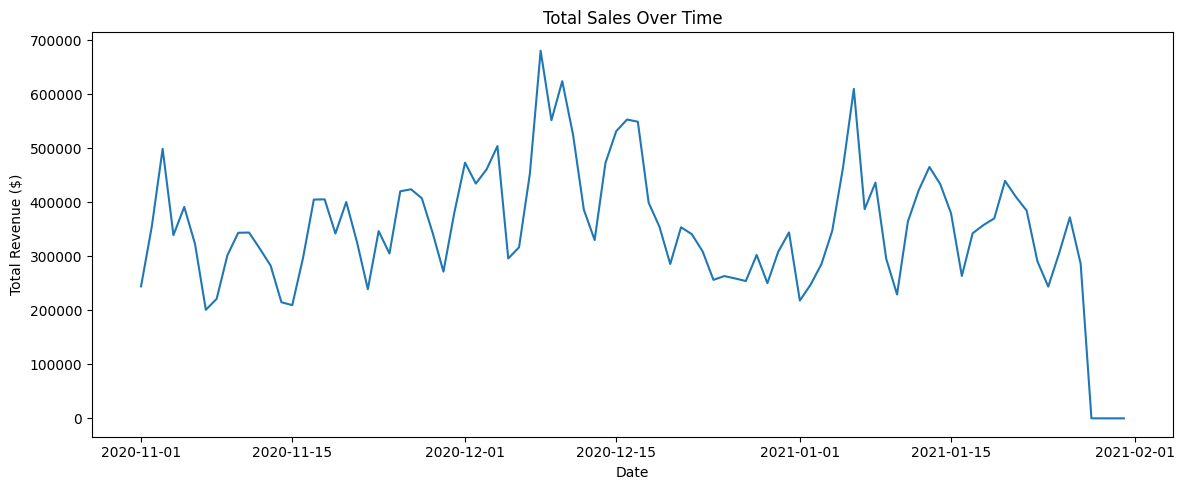

In [ ]:
daily_sales = (
    df.groupby("order_date", as_index=False)["price"]
      .sum()
      .sort_values("order_date")
)

plt.figure(figsize=(12, 5))
plt.plot(daily_sales["order_date"], daily_sales["price"])
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()


Total sales fluctuate over time with noticeable peaks and drops, indicating **uneven daily demand rather than stable sales volume**.

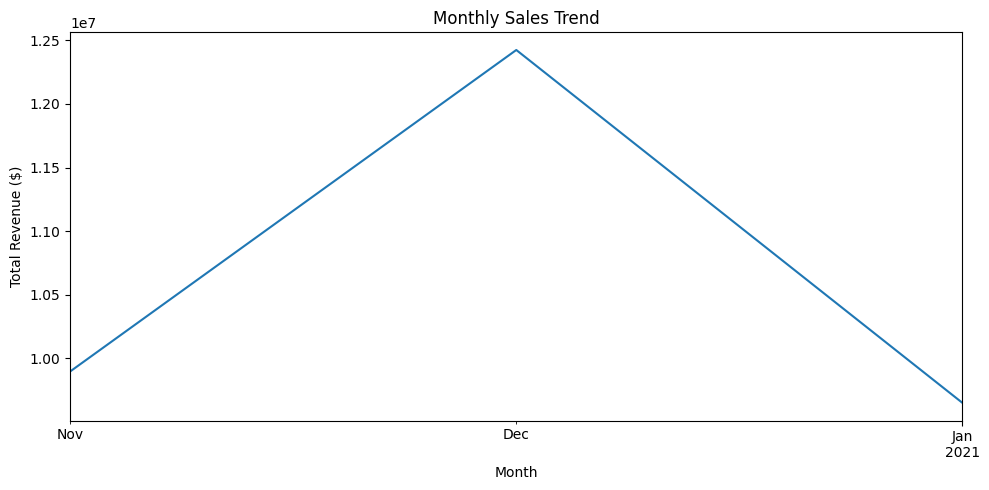

In [ ]:
df["month"] = df["order_date"].astype("datetime64[ns]").dt.to_period("M")

monthly_sales = (
    df.groupby("month")["price"]
      .sum()
      .sort_index()
)

plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()


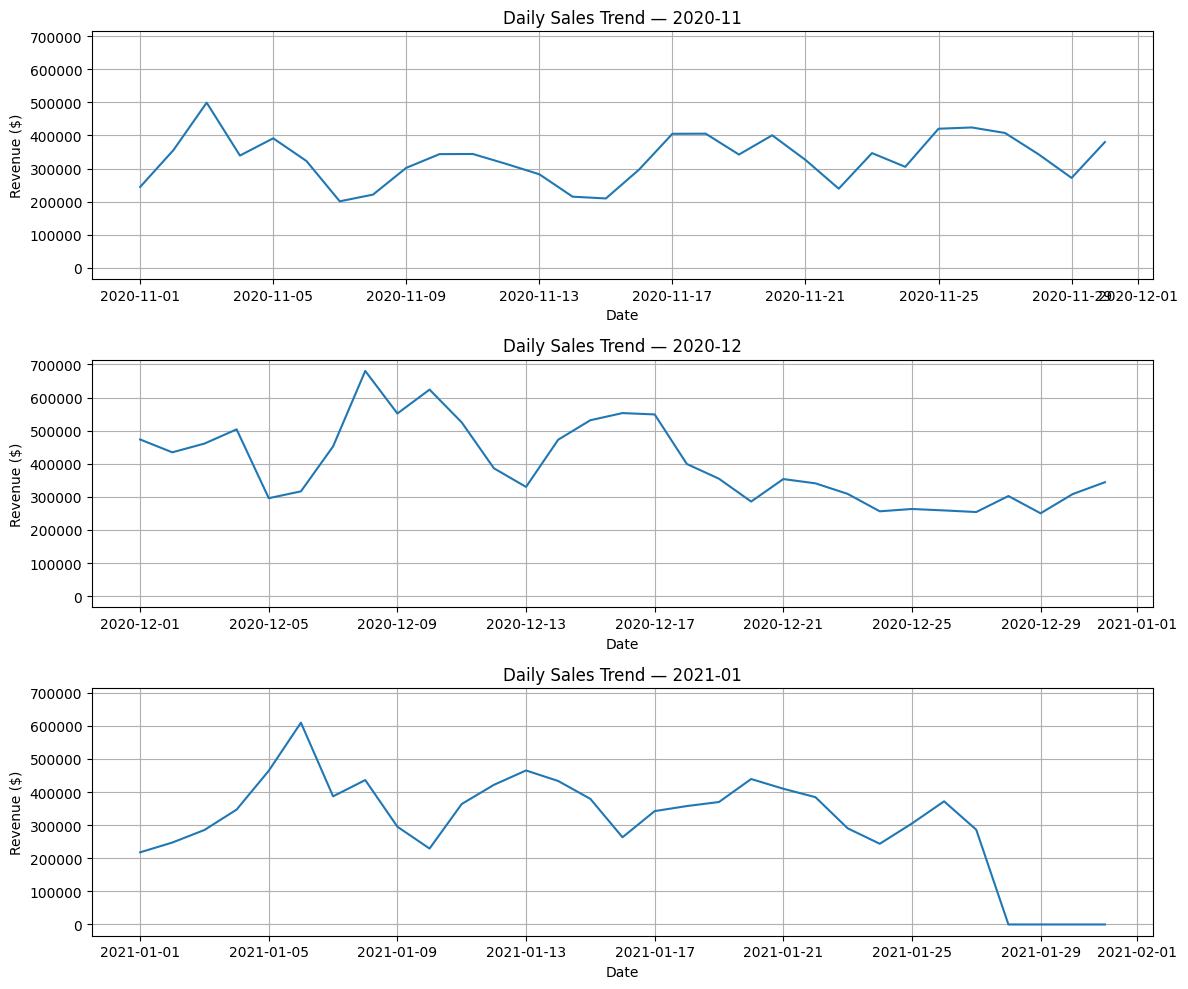

In [ ]:
# Ensure datetime type
df["order_date"] = pd.to_datetime(df["order_date"])

# Filter required period
df_period = df[
    (df["order_date"] >= "2020-11-01") &
    (df["order_date"] <= "2021-01-31")
].copy()

# Create month column
df_period["month"] = df_period["order_date"].dt.to_period("M")

# Aggregate daily sales
daily_sales = (
    df_period
    .groupby(["order_date", "month"])["price"]
    .sum()
    .reset_index()
)

# Get unique months
months = daily_sales["month"].unique()

# Create subplots
fig, axes = plt.subplots(len(months), 1, figsize=(12, 10), sharey=True)

for ax, month in zip(axes, months):
    month_data = daily_sales[daily_sales["month"] == month]

    ax.plot(month_data["order_date"], month_data["price"])
    ax.set_title(f"Daily Sales Trend — {month}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Revenue ($)")
    ax.grid(True)

plt.tight_layout()
plt.show()


Monthly sales dynamics show noticeable differences across months. **December demonstrates higher revenue levels and increased volatility, likely driven by seasonal demand**. January shows a post-holiday decline, while November remains relatively stable.

#### **Sales dynamics by continent (America, Asia, Europe)**

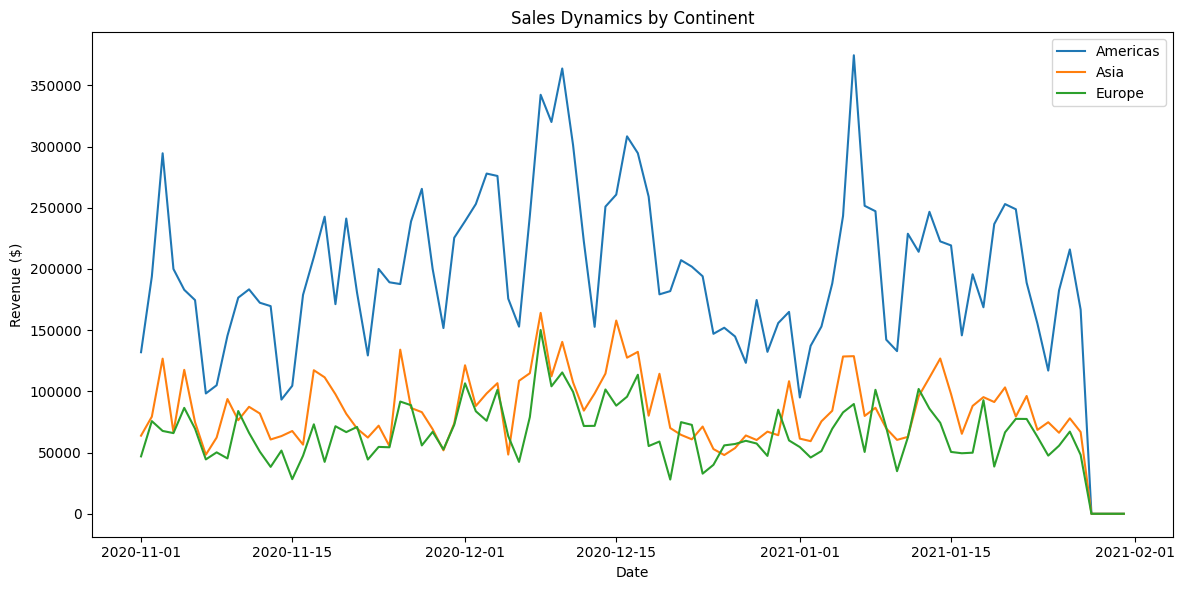

In [ ]:
continent_sales = (
    df[df["continent"].isin(["Americas", "Asia", "Europe"])]
    .groupby(["order_date", "continent"])["price"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))

for continent in ["Americas", "Asia", "Europe"]:
    subset = continent_sales[continent_sales["continent"] == continent]
    plt.plot(subset["order_date"], subset["price"], label=continent)

plt.title("Sales Dynamics by Continent")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.tight_layout()
plt.show()


The **Americas** consistently generate the highest revenue, while **Asia** and **Europe** follow similar but lower trajectories. Sales dynamics across continents generally move in parallel, **suggesting global demand drivers rather than region-specific shocks**.

#### **Sales Dynamics Analysis**

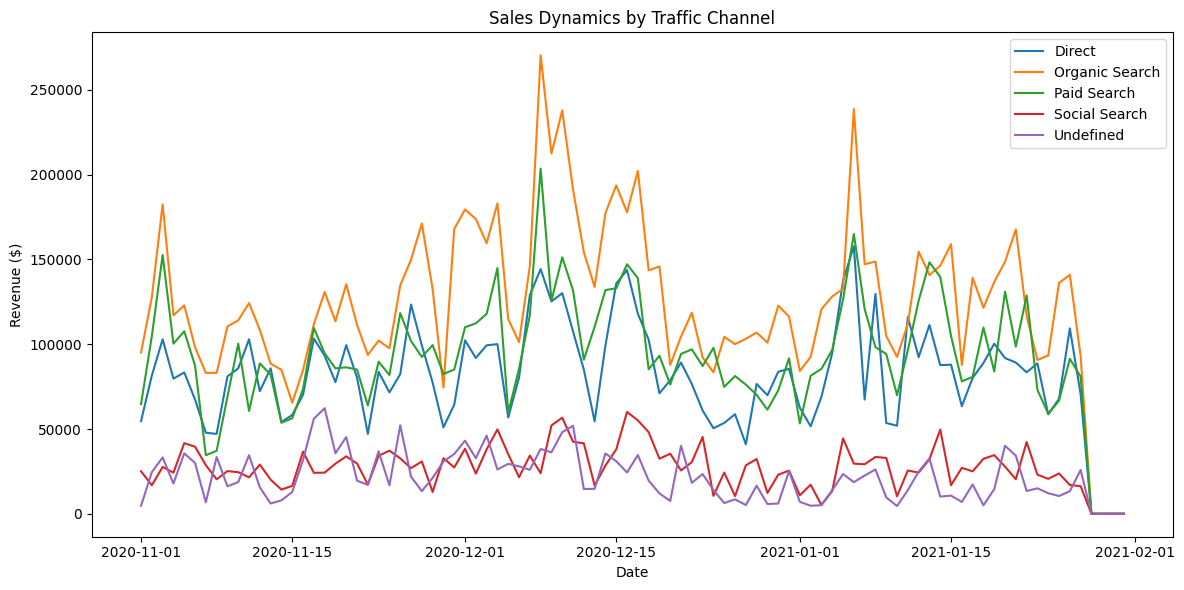

In [ ]:
traffic_sales = (
    df.groupby(["order_date", "traffic_channel"])["price"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(12, 6))

for channel in traffic_sales["traffic_channel"].unique():
    subset = traffic_sales[traffic_sales["traffic_channel"] == channel]
    plt.plot(subset["order_date"], subset["price"], label=channel)

plt.title("Sales Dynamics by Traffic Channel")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.tight_layout()
plt.show()


#### **Sales Dynamics Analysis**
 1. *Channel Dominance*

* **Organic Search:** The undisputed leader in revenue volume throughout the entire period. It consistently generates the most capital, frequently exceeding the **$150,000 – $200,000** level.
* **Paid Search and Direct:** These two channels perform neck-and-neck, holding the second and third positions. Their dynamics are very similar, suggesting that paid advertising may be driving direct traffic to the site.
* **Social Search and Undefined:** These are the weakest channels, typically failing to rise above the **$50,000** mark.
 2. *Key Peaks and Seasonality*

* **Early December Peak (Cyber Week / Black Friday):** A sharp spike in revenue is observed across all major channels. Organic Search reached its maximum at over **$250,000**, indicating high effectiveness of pre-holiday sales.
* **Pre-New Year Surge:** Another notable uptick occurred in mid-December, followed by a natural decline in activity during the actual holidays (late December – early January).
* **January Surge:** A high peak is visible in early January, which may be attributed to post-holiday promotions and clearances.


#### **Sales dynamics by device type**

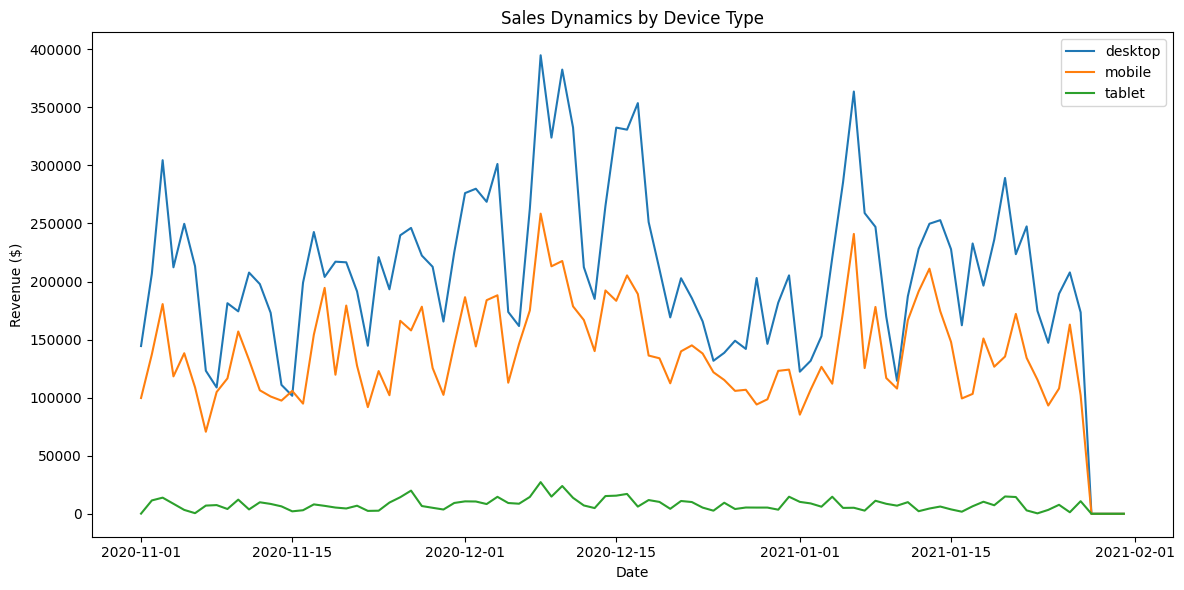

In [ ]:
device_sales = (
    df.groupby(["order_date", "device"])["price"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(12, 6))

for device in device_sales["device"].unique():
    subset = device_sales[device_sales["device"] == device]
    plt.plot(subset["order_date"], subset["price"], label=device)

plt.title("Sales Dynamics by Device Type")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.tight_layout()
plt.show()



#### Analysis by Device Type

**Desktop Dominance**: Desktop is the primary source of revenue, consistently outperforming mobile devices and tablets. Its peak values reach nearly $400,000 in December.

**Mobile** as a Significant Share: Mobile traffic holds a solid second place, generating between 100,000 and 250,000 during peak periods.

Low **Tablet** Performance: Tablets contribute the least amount of revenue, rarely exceeding the $25,000 mark.

**Sales dynamics** show noticeable *daily volatility*, indicating non-uniform purchasing behavior.

Strong **seasonality** cannot be conclusively identified due to the limited time window, though year-end uplift is evident.

The **Americas** remain the key revenue-driving region.

**Organic** and **Direct** **traffic channels** provide the most stable sales contribution.

**Desktop** devices are the primary driver of revenue across the entire period.

#**Pivot tables**

**Number of sessions by traffic channels and device types**

In [ ]:
sessions_pivot = (
    df.dropna(subset=["traffic_channel", "device"])
      .pivot_table(
          index="traffic_channel",
          columns="device",
          values="ga_session_id",
          aggfunc="nunique",
          fill_value=0
      )
      .sort_values(by='desktop', ascending=False) # sorting by 'desktop' column
)

sessions_pivot

device,desktop,mobile,tablet
traffic_channel,,,
Organic Search,72622,49014,2789
Paid Search,55167,37034,2140
Direct,47825,31745,1812
Social Search,16288,10988,638
Undefined,12527,8486,470


**Sessions by Traffic Channel and Device Type**

**Conclusion:**

Across all traffic channels, desktop is the dominant device, followed by mobile, with tablets contributing a marginal share. Organic Search and Paid Search generate the highest session volumes across all device types, indicating strong performance of search-driven acquisition. Social Search and Undefined channels play a noticeably smaller role in overall traffic generation.

**Total sales by category (Top-10) in countries (Top-5)**

In [ ]:
top_5_countries = (
    df.groupby("country")["price"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
)

top_10_categories = (
    df.groupby("category")["price"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index
)


sales_pivot = (
    df[
        df["country"].isin(top_5_countries) &
        df["category"].isin(top_10_categories)
    ]
    .pivot_table(
        index="category",
        columns="country",
        values="price",
        aggfunc="sum",
        fill_value=0
    )
    .loc[top_10_categories]
)

sales_pivot



country,Canada,France,India,United Kingdom,United States
category,,,,,
Sofas & armchairs,692427.5,187735.0,788430.0,234812.0,3707144.5
Chairs,417740.8,134029.4,544309.2,188519.4,2619773.8
Beds,354772.0,116414.0,358319.5,133816.0,2213058.0
Bookcases & shelving units,278981.9,73830.0,364507.4,113987.6,1567606.9
Cabinets & cupboards,181802.0,59101.5,191888.0,71684.5,994545.5
Outdoor furniture,185322.8,40486.4,162289.4,57002.4,929245.2
Tables & desks,132678.0,42299.0,186157.5,49374.0,777865.0
Chests of drawers & drawer units,71952.0,21544.5,73111.0,36784.0,382388.0
Bar furniture,51724.0,11199.0,57657.0,22103.0,330805.0


**Top-10 Product Categories by Revenue in Top-5 Countries**

**Conclusion:**
**The United States** overwhelmingly drives revenue across all top categories, significantly outperforming other countries. The revenue structure is highly consistent across markets: Sofas & armchairs, Chairs, and Beds are the top three categories in every country. This indicates a stable global demand pattern with limited regional variation in category preferences.

**Average check by traffic channels and devices**

In [ ]:
aov_pivot = (
    df.dropna(subset=["traffic_channel", "device", "price"])
      .pivot_table(
          index="traffic_channel",
          columns="device",
          values="price",
          aggfunc="mean"
      )
      .round(2)
)

aov_pivot


device,desktop,mobile,tablet
traffic_channel,,,
Direct,960.82,963.26,918.73
Organic Search,969.06,947.13,902.62
Paid Search,946.01,931.74,985.70
Social Search,908.02,945.27,1368.66
Undefined,993.19,915.22,1460.20


**Average Order Value by Traffic Channel and Device Type**

**Conclusion**:
Average order value is relatively stable across desktop and mobile devices, suggesting similar purchasing behavior. However, tablet users show unusually high AOV in Social Search and Undefined channels, likely driven by a small number of high-value orders rather than volume, which should be interpreted cautiously. Overall, Direct and Organic channels maintain consistently strong AOV performance.

**Sales by continent and traffic channel**

In [ ]:
continent_channel_pivot = (
    df.dropna(subset=["continent", "traffic_channel"])
      .pivot_table(
          index="continent",
          columns="traffic_channel",
          values="price",
          aggfunc="sum",
          fill_value=0
      )
)

continent_channel_pivot


traffic_channel,Direct,Organic Search,Paid Search,Social Search,Undefined
continent,,,,,
(not set),21443.0,15080.0,19931.0,11224.4,6389.0
Africa,70028.0,129908.4,88195.0,31187.6,11912.0
Americas,4222962.0,6294563.2,4627454.3,1384427.7,1135872.8
Asia,1755294.5,2725953.8,2039256.5,576031.8,504761.7
Europe,1343093.9,2154138.6,1620206.1,498507.1,318678.5
Oceania,82102.0,113507.6,116006.5,30727.1,22887.0


**Revenue by Continent and Traffic Channel**

**Conclusion**:
The **Americas** **generate the highest revenue across all traffic channels**, followed by Asia and Europe. **Organic Searc**h is the **top-performing channel** on every continent, confirming its strategic importance. **Paid Search** and **Direct **channels also contribute significantly, while Social Search and Undefined channels have a comparatively minor revenue impact across regions.

# **Statistical analysis of relationships.**

#### **Relationship between number of sessions and total sales by date**

In [ ]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

daily_metrics = (
    df.groupby("order_date")
      .agg(
          sessions=("ga_session_id", "nunique"),
          revenue=("price", "sum")
      )
      .reset_index()
)


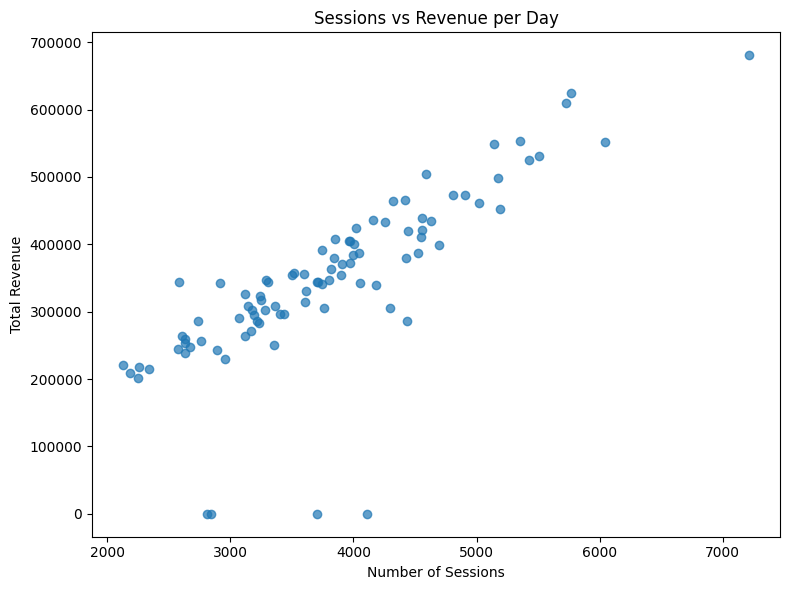

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(daily_metrics["sessions"], daily_metrics["revenue"], alpha=0.7)
plt.xlabel("Number of Sessions")
plt.ylabel("Total Revenue")
plt.title("Sessions vs Revenue per Day")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate p-value Pearson correlation
print(f"Test statistic and p-value: {pearsonr(daily_metrics["sessions"], daily_metrics["revenue"])}")

# Calculate Pearson correlation
pearson_corr = daily_metrics["sessions"].corr(daily_metrics["revenue"])
print(f"Pearson Correlation: {pearson_corr}")


# Calculate p-value Spearman correlation
print(
    f"Test statistic and p-value: {spearmanr(daily_metrics["sessions"], daily_metrics["revenue"])}"
)


# Calculate Spearman correlation
spearman_corr = daily_metrics["sessions"].corr(
    daily_metrics["revenue"], method="spearman"
)
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value: PearsonRResult(statistic=np.float64(0.7910809164540891), pvalue=np.float64(6.483532312080735e-21))
Pearson Correlation: 0.7910809164540887
Test statistic and p-value: SignificanceResult(statistic=np.float64(0.8653062174563682), pvalue=np.float64(9.755923586156614e-29))
Spearman Correlation: 0.8653062174563682


**Relationship between number of sessions and total sales by date**

There is a **strong positive relationship** between the number of sessions and total daily sales.
Both **Pearson (r = 0.79)** and **Spearman (ρ = 0.87)** correlations are high and **statistically significant (p ≪ 0.05)**.
This indicates that **higher traffic volumes consistently lead to higher sales**, and t**he relationship is both linear and monotonic**.

#### **Sales correlation between continents (Top-3)**

In [ ]:
top_continents = ["Americas", "Asia", "Europe"]

continent_daily_sales = (
    df[df["continent"].isin(top_continents)]
    .groupby(["order_date", "continent"])["price"]
    .sum()
    .unstack()
)


In [ ]:
continent_corr = continent_daily_sales.corr()
continent_corr


continent,Americas,Asia,Europe
continent,,,
Americas,1.000000,0.792025,0.770586
Asia,0.792025,1.000000,0.768427
Europe,0.770586,0.768427,1.000000


In [ ]:
for c1 in top_continents:
    for c2 in top_continents:
        if c1 < c2:
            corr, p = pearsonr(
                continent_daily_sales[c1],
                continent_daily_sales[c2]
            )
            print(f"{c1} vs {c2}: corr={corr:.2f}, p-value={p:.4f}")


Americas vs Asia: corr=0.79, p-value=0.0000
Americas vs Europe: corr=0.77, p-value=0.0000
Asia vs Europe: corr=0.77, p-value=0.0000


**Sales correlation between continents (Top-3)**

Sales in **Americas, Asia, and Europe** show **strong positive correlations** with each other (r ≈ 0.77 - 0.79).
All correlations are **statistically significan**t, suggesting that sales dynamics across these continents follow **similar temporal patterns**, likely driven by global seasonality or synchronized campaigns.

#### **Sales correlation by traffic channels**

In [ ]:
channel_daily_sales = (
    df.dropna(subset=["traffic_channel"])
      .groupby(["order_date", "traffic_channel"])["price"]
      .sum()
      .unstack()
)


In [ ]:
channel_corr = channel_daily_sales.corr()
channel_corr


traffic_channel,Direct,Organic Search,Paid Search,Social Search,Undefined
traffic_channel,,,,,
Direct,1.000000,0.837833,0.814072,0.604060,0.517505
Organic Search,0.837833,1.000000,0.870086,0.583117,0.526068
Paid Search,0.814072,0.870086,1.000000,0.596428,0.521961
Social Search,0.604060,0.583117,0.596428,1.000000,0.455126
Undefined,0.517505,0.526068,0.521961,0.455126,1.000000


**Sales correlation by traffic channels**

Sales across traffic channels are **positively correlated**, with strong relationships between:

* **Organic Search and Paid Search**

* **Direct and Organic Search**

Social Search and Undefined channels show moderate correlations, indicating more independent behavior.
Overall, this suggests that **major traffic channels respond similarly to demand fluctuations, while secondary channels are less synchronized.**

#### **Sales correlation between top 5 product categories**

In [ ]:
top_categories = (
    df.groupby("category")["price"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
)

category_daily_sales = (
    df[df["category"].isin(top_categories)]
    .groupby(["order_date", "category"])["price"]
    .sum()
    .unstack()
)


In [ ]:
category_corr = category_daily_sales.corr()
category_corr


category,Beds,Bookcases & shelving units,Cabinets & cupboards,Chairs,Sofas & armchairs
category,,,,,
Beds,1.000000,0.592913,0.514609,0.554500,0.535378
Bookcases & shelving units,0.592913,1.000000,0.539428,0.637090,0.666194
Cabinets & cupboards,0.514609,0.539428,1.000000,0.572870,0.657563
Chairs,0.554500,0.637090,0.572870,1.000000,0.578248
Sofas & armchairs,0.535378,0.666194,0.657563,0.578248,1.000000


**Sales correlation between top-5 product categories**

All **top product categories show moderate positive correlations (r ≈ 0.51 - 0.67)**.
This implies that increases in sales for one major category are often accompanied by increases in others, reflecting shared demand drivers such as promotions, seasonality, or general purchasing power rather than isolated category trends.

#### **Correlation between number of orders and average check**

In [ ]:
from scipy.stats import pearsonr

daily_orders_aov = (
    df.dropna(subset=["price"])
      .groupby("order_date")
      .agg(
          orders=("price", "count"),
          aov=("price", "mean")
      )
)

# delete all 0 orders and NaN
daily_orders_aov = daily_orders_aov[
    (daily_orders_aov["orders"] > 0) &
    (daily_orders_aov["aov"].notna())
]

pearsonr(
    daily_orders_aov["orders"],
    daily_orders_aov["aov"]
)



PearsonRResult(statistic=np.float64(0.11582024744554015), pvalue=np.float64(0.28256438015876556))

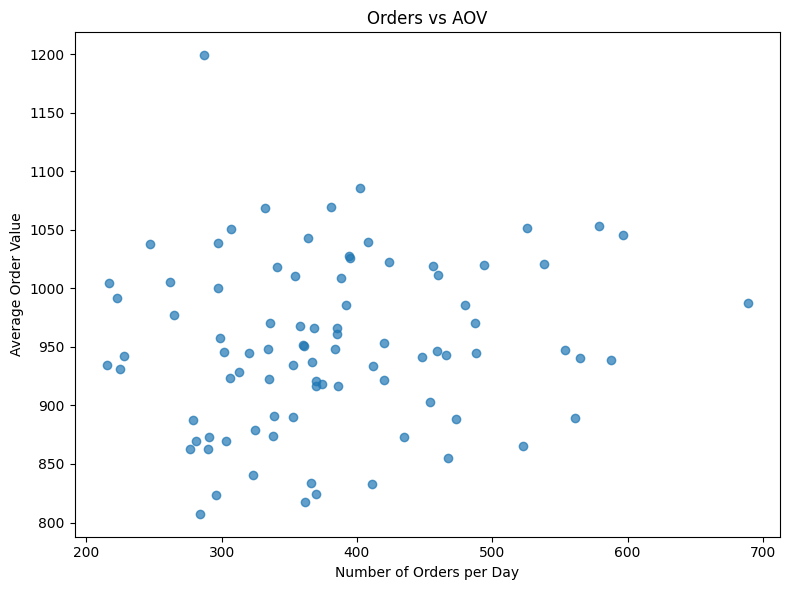

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    daily_orders_aov["orders"],
    daily_orders_aov["aov"],
    alpha=0.7
)
plt.xlabel("Number of Orders per Day")
plt.ylabel("Average Order Value")
plt.title("Orders vs AOV")
plt.tight_layout()
plt.show()


**Correlation between number of orders and average check (AOV)**

There is **no statistically significant correlation** between the number of orders and the average order value **(r ≈ 0.12, p > 0.05)**.
This indicates that higher order volumes do not systematically lead to higher or lower average checks, suggesting independent dynamics between demand quantity and purchase value.

#### **Sales correlation in the Top-5 countries**





In [ ]:
#Identify top-5 countries by revenue

top5_countries = (
    df.groupby("country")["price"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
      .tolist()
)


#Create daily sales table for these countries
daily_country_sales = (
    df[df["country"].isin(top5_countries)]
    .groupby(["order_date", "country"])["price"]
    .sum()
    .unstack(fill_value=0)
)

daily_country_sales.head()


country,Canada,France,India,United Kingdom,United States
order_date,,,,,
2020-11-01,10689.0,4403.0,18233.0,19433.0,115244.5
2020-11-02,32977.0,5214.0,24811.0,14498.0,145356.0
2020-11-03,33645.5,10644.0,52211.4,9033.0,243143.3
2020-11-04,20374.0,800.0,14027.0,7390.0,161519.5
2020-11-05,27295.6,19962.0,33781.0,9576.0,138650.2


In [ ]:
#Correlation matrix (Pearson)
correlation_matrix = daily_country_sales.corr(method="pearson")

correlation_matrix


country,Canada,France,India,United Kingdom,United States
country,,,,,
Canada,1.000000,0.390938,0.501087,0.359456,0.674377
France,0.390938,1.000000,0.361792,0.254683,0.465355
India,0.501087,0.361792,1.000000,0.457022,0.678352
United Kingdom,0.359456,0.254683,0.457022,1.000000,0.456354
United States,0.674377,0.465355,0.678352,0.456354,1.000000


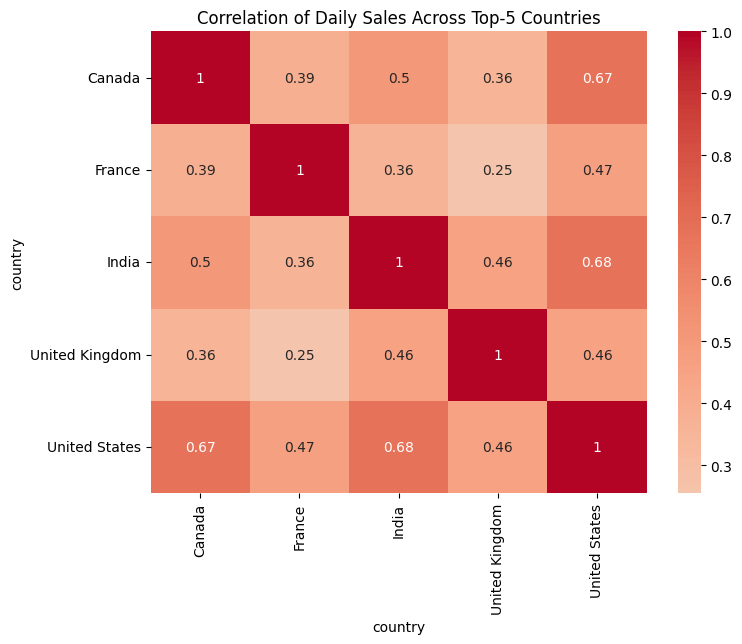

In [ ]:
#Visualize correlations (heatmap)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Daily Sales Across Top-5 Countries")
plt.show()


In [ ]:
#Test statistical significance of correlations
corr_results = []

countries = daily_country_sales.columns

for i in range(len(countries)):
    for j in range(i+1, len(countries)):
        r, p = pearsonr(
            daily_country_sales[countries[i]],
            daily_country_sales[countries[j]]
        )
        corr_results.append((countries[i], countries[j], r, p))

corr_df = pd.DataFrame(
    corr_results,
    columns=["Country 1", "Country 2", "Correlation (r)", "p-value"]
)

corr_df.sort_values("Correlation (r)", ascending=False)


,Country 1,Country 2,Correlation (r),p-value
8,India,United States,0.678352,1.093088e-13
3,Canada,United States,0.674377,1.717139e-13
1,Canada,India,0.501087,3.630602e-07
6,France,United States,0.465355,2.954817e-06
7,India,United Kingdom,0.457022,4.661101e-06
9,United Kingdom,United States,0.456354,4.832133e-06
0,Canada,France,0.390938,1.166838e-04
4,France,India,0.361792,3.947345e-04
2,Canada,United Kingdom,0.359456,4.331290e-04
5,France,United Kingdom,0.254683,1.428648e-02


**Sales correlation in the Top-5 countries**

Sales in the Top-5 countries show moderate to **strong positive correlations, with the strongest relationships** involving:

* **United States & India**

* **United States & Canada**

All pairwise correlations are **statistically significan**t, but their strengths vary.
This suggests that while global trends influence all major markets, **regional factors and local market dynamics** still play an important role.

# **Statistical analysis of differences between groups.**

### **Registered vs Unregistered users: daily sales comparison**

In [ ]:
# Create groups
#Registered user = account_id is not null.
df["is_registered"] = df["account_id"].notna().astype(int)

#Aggregate daily sales per group:
daily_sales_by_group = (
    df.groupby(["order_date", "is_registered"])["price"]
      .sum()
      .unstack(fill_value=0)
)

daily_sales_by_group.head()


is_registered,0,1
order_date,,
2020-11-01,222745.5,21547.0
2020-11-02,310550.0,44956.8
2020-11-03,469829.1,29150.5
2020-11-04,318204.9,20982.2
2020-11-05,365942.0,25334.6


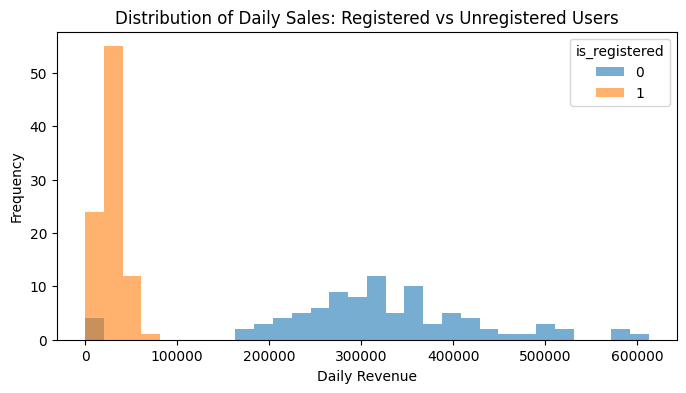

In [ ]:
#Explore distributions
daily_sales_by_group.plot(
    kind="hist",
    bins=30,
    alpha=0.6,
    figsize=(8, 4)
)
plt.title("Distribution of Daily Sales: Registered vs Unregistered Users")
plt.xlabel("Daily Revenue")
plt.show()


In [ ]:
#Choose statistical test
#Two independent samples
#Non-normal distributions

#Mann–Whitney U test (non-parametric)

from scipy.stats import mannwhitneyu

registered = daily_sales_by_group[1]
unregistered = daily_sales_by_group[0]

stat, p = mannwhitneyu(registered, unregistered, alternative="two-sided")
stat, p

(np.float64(360.0), np.float64(8.379540669190225e-27))

#### **Conclusion**

The Mann-Whitney U test shows **p < 0.05** → daily sales of registered and unregistered users are **statistically different**

**Registered users typically generate higher daily revenue**, confirming their higher commercial value

### **Session counts across traffic channels**

In [ ]:
#Do traffic channels generate different session volumes?
#Create groups by traffic channels
sessions_by_channel = (
    df.groupby("traffic_channel")["ga_session_id"]
      .nunique()
)
sessions_by_channel


#Choose statistical test

#More than 2 independent groups
#Count data, non-normal
#Kruskal - Wallis test

from scipy.stats import kruskal

groups = [
    df[df["traffic_channel"] == ch]["ga_session_id"].nunique()
    for ch in df["traffic_channel"].unique()
]

kruskal(*groups)

#Conceptually: better applied on daily sessions per channel:
daily_sessions_channel = (
    df.groupby(["order_date", "traffic_channel"])["ga_session_id"]
      .nunique()
      .unstack(fill_value=0)
)

kruskal(*[daily_sessions_channel[col] for col in daily_sessions_channel.columns])



KruskalResult(statistic=np.float64(368.98057369864847), pvalue=np.float64(1.397036102599359e-78))

**Conclusion**

**p < 0.05** → session volumes differ significantly between traffic channels

Confirms that channels contribute **unequally** to traffic generation

###**Organic traffic share: Europe vs Americas**

In [ ]:
#Build contingency table
df_region = df[df["continent"].isin(["Europe", "Americas"])].copy()

df_region["is_organic"] = (
    df_region["traffic_channel"] == "Organic Search"
).astype(int)


contingency = pd.crosstab(
    df_region["continent"],
    df_region["is_organic"]
)

contingency


is_organic,0,1
continent,,
Americas,124508,68671
Europe,41940,23195


In [ ]:
#Statistical test

#Comparing proportions
#Categorical data
#Chi-square test of independence
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
chi2, p


(np.float64(0.08110059225974814), np.float64(0.7758114260479175))

**Organic traffic share: Europe vs Americas**

The Chi-square test shows **no statistically significant difference in the share of organic traffic between Europe and the Americas (p ≈ 0.78)**.
This suggests that the proportion of organic sessions is similar in both regions, indicating comparable reliance on organic acquisition.

### **AOV difference by device type**

In [ ]:
# Test: Kruskal–Wallis: numeric vs categorical (3+ groups)

kruskal(
    *[df[df["device"] == d]["price"].dropna()
      for d in df["device"].unique()]
)


KruskalResult(statistic=np.float64(4.193598984874611), pvalue=np.float64(0.12284897882315772))

In [ ]:
#Conversion rate: mobile vs desktop. Chi-square (proportions)
conversion_device = pd.crosstab(
    df["device"],
    df["price"].notna()
)

chi2_contingency(conversion_device)

Chi2ContingencyResult(statistic=np.float64(2.0392209727299457), pvalue=np.float64(0.36073542417743887), dof=2, expected_freq=array([[184814.53032657,  19614.46967343],
       [124096.56229956,  13170.43770044],
       [  7095.90737387,    753.09262613]]))

**AOV difference by device type**

Both the Kruskal-Wallis test and the Chi-square test indicate **no statistically significant differences in average order value or conversion behavior across device types (p > 0.05)**.
This implies that device type does not materially affect purchase value or conversion patterns.

### **Registered vs unregistered: AOV comparison**

In [ ]:
#Mann–Whitney U
mannwhitneyu(
    df[df["is_registered"] == 1]["price"].dropna(),
    df[df["is_registered"] == 0]["price"].dropna()
)


MannwhitneyuResult(statistic=np.float64(41771375.0), pvalue=np.float64(0.041590896614016215))

**Registered vs Unregistered users: AOV comparison**

The Mann-Whitney U test shows a** statistically significant difference in AOV between registered and unregistered users (p < 0.05)**.
This indicates that user registration status influences not only purchase frequency but also average spending per order.

**Overall takeaway**

Statistically significant differences are observed in **user registration status** and traffic channel performance, while regional organic traffic structure and **device-based purchasing behavior** remain largely similar.

[Dashboards](https://public.tableau.com/views/Sales_PerformanceTrendUserBehaviour/SalesPerformanceTrends?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)